In [1]:
import pandas as pd
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
df.shape

(1000, 8)

In [4]:
df_keys=list(df.keys())
df_keys

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [5]:
for key in df_keys:
    print(df[key].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- 리딩과 라이팅은 비슷한 평균, Q1, Q3를 가짐
- 수학은 이에 비해 전반적으로 살짝 낮은 분포를 보일듯함

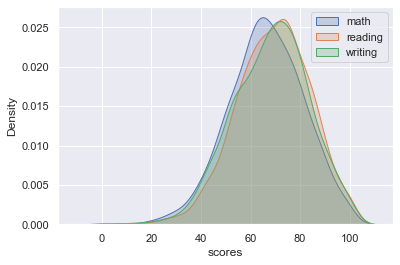

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

scores=['math score', 'reading score', 'writing score']

sns.set()
for subject in scores:
    sns.kdeplot(df[subject], shade=True)
plt.legend(['math', 'reading', 'writing'])
plt.xlabel('scores')
plt.show()

- 세 과목 모두 비슷한 bell-shaped 분포를 보임
- 하지만 리딩과 라이팅은 거의 겹칠 정도로 유사한 반면 수학은 살짝 왼쪽으로 빠져나와있음

C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


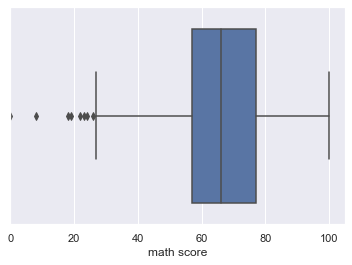

C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


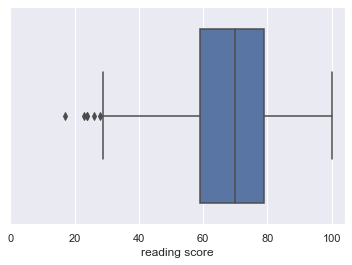

C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


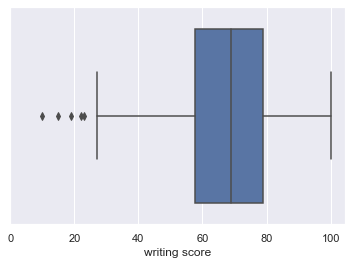

In [8]:
for subject in scores:
    sns.boxplot(df[subject])
    plt.xlim(left=0)
    plt.show()

- boxplot에서도 유사하지만 수학이 전반적으로 살짝 낮은 점수를 보임

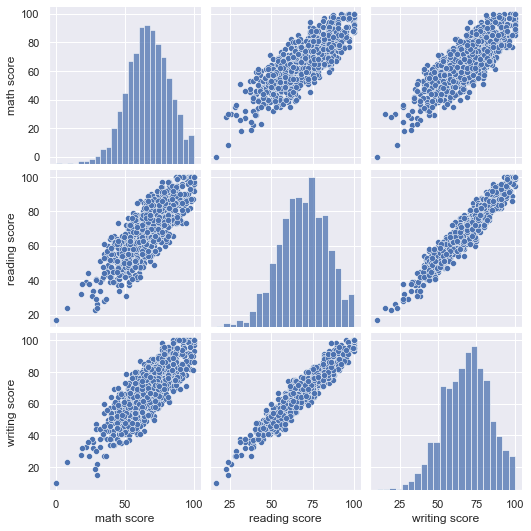

In [9]:
sns.pairplot(df)

- 세 과목은 모두 linear 관계를 보이며 특히 reading과 writing은 더 뚜렷한 상관관계를 보인다

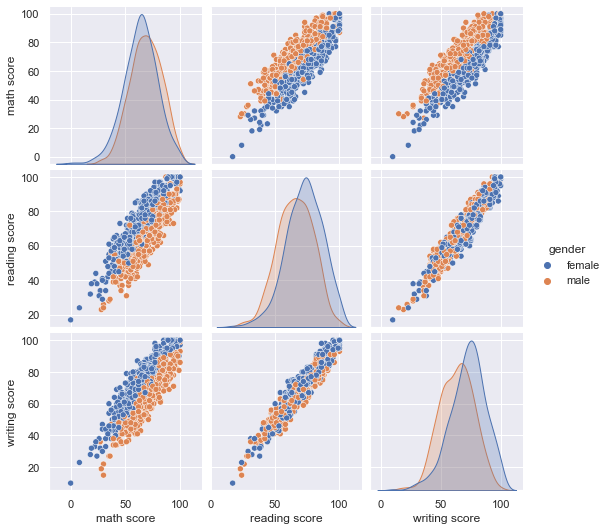

In [10]:
sns.pairplot(df, hue='gender')

- 여학생은 리딩과 라이팅에, 남학생은 수학에 더 높은 성적을 보인다

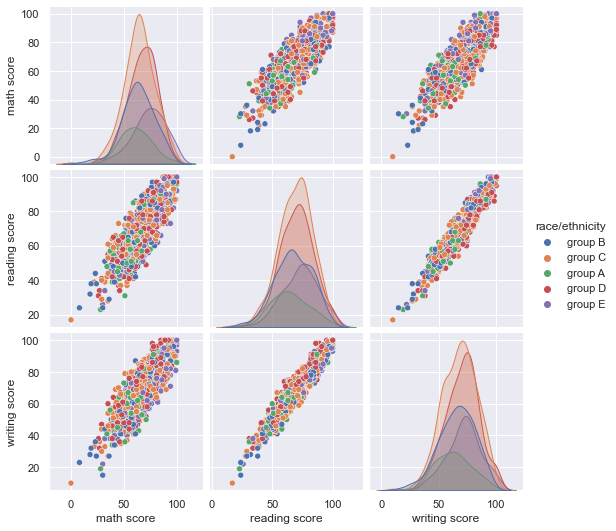

In [11]:
sns.pairplot(df, hue='race/ethnicity')

- group C와 D가 가장 많은 비중을 차지하고 있으며 평균도 높은 편에 속한다
- group E는 적은 비중을 차지하지만 평균이 상위권에 있다
- group A는 평균이 낮다

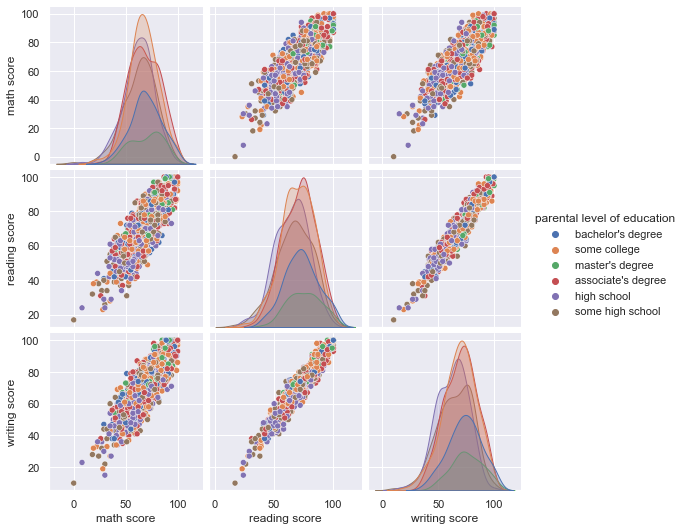

In [12]:
sns.pairplot(df, hue='parental level of education')

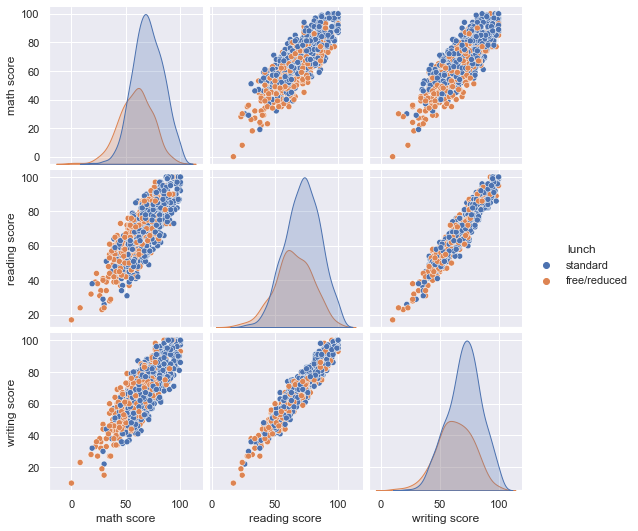

In [13]:
sns.pairplot(df, hue='lunch')

- standard가 더 높은 비중과 평균을 보인다

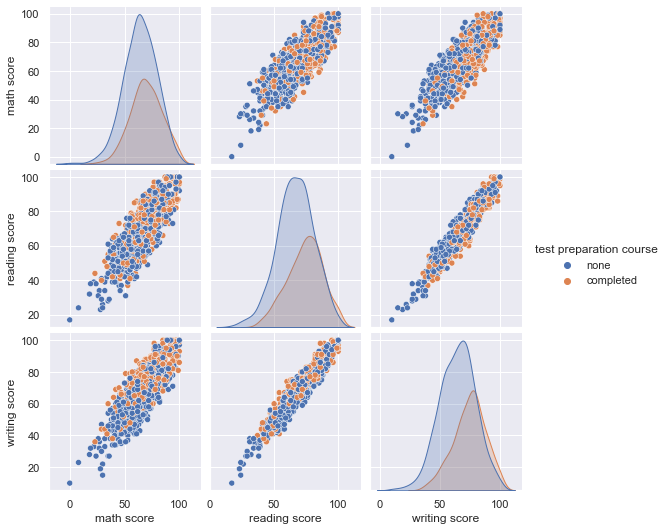

In [14]:
sns.pairplot(df, hue='test preparation course')

- completed가 비중은 더 낮지만 더 높은 평균을 보인다

In [15]:
df_pv=df.pivot('gender', 'race/ethnicity', 'math score')

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
import matplotlib.gridspec as gridspec
cat_col=['gender', 'race/ethnicity', 'lunch', 'test preparation course']

for subject in scores:
    print(f"{subject}")
    grid = gridspec.GridSpec(2,2) 
    plt.figure(figsize=(12,10))
    plt.subplots_adjust(wspace=0.5, hspace=0.3) 
    for idx, feature in enumerate(cat_col):
        ax=plt.subplot(grid[idx])
        sns.boxplot(x=feature, y=subject, data=df, ax=ax, palette='pastel')
    plt.show()

In [ ]:
col='parental level of education'

for subject in scores:
    sns.boxplot(x=col, y=subject, data=df, palette='pastel')
    plt.title(f"{subject}")
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(2,2) 
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace=0.5, hspace=0.3) 

for idx, feature in enumerate(cat_col):
    ax=plt.subplot(grid[idx])
    sns.countplot(x=feature, data=df, ax=ax)
    plt.xticks(rotation=45)

In [ ]:
sns.countplot(x=col, data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# target variable로 total score 만들어보기 트라이 해보자
# pie chart도 트라이해보자
# 등급별 상관관계 해보자

# pivot 문제 해결하기
# gender와 race에 따른 점수 차이 확인해보기